## Red Wine Project: 
#### we are using Red Wine Quality dataset to build various classification models to predict whether a particular red wine is “good quality” or not. Each wine in this dataset is given a “quality” score between 0 and 10. For the purpose of this project,  each wine is either “good quality” (a score of 7 or higher) or not (a score below 7).

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset:

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv", error_bad_lines=False)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape # Checking the data dimension.

(1599, 12)

In [4]:
df.describe() # Statistical summary.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### The summary of Red Wine dataset looks perfect, there is no visible abnormality in data (invalid/negative values).
#### All the data seems to be in range (with different scales, which needs standardization).

In [5]:
## checking the null values in Dataset: 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### here we dont have any null values. 

## EDA

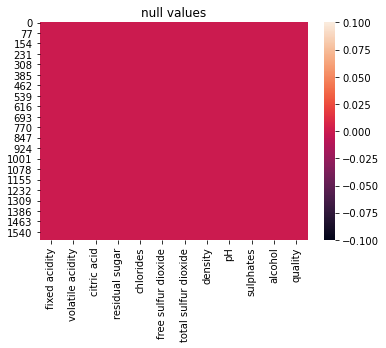

In [6]:
sns.heatmap(df.isnull())
plt.title('null values')
plt.show()

In [7]:
##Learning more about the target/response variable/feature:¶
## Let's check how many unique values does the target feature 'quality' 

In [8]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
## And how data is distributed among those values?
df.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

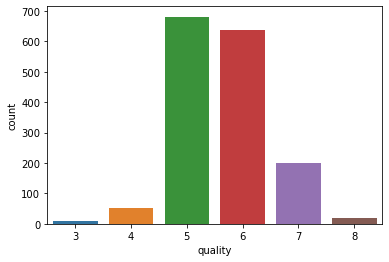

In [10]:
sns.countplot(x='quality', data=df)

#### above distribution shows the range for response variable (quality) is between 3 to 8.

In [11]:
conditions = [
    (df['quality'] >= 7),
    (df['quality'] <= 6)
]
rating = ['good', 'bad']
df['rating'] = np.select(conditions, rating)
df.rating.value_counts()

bad     1382
good     217
Name: rating, dtype: int64

#### As we can see the data division with Good Quality and bad Quality.

In [12]:
df.groupby('rating').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
bad,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,5.408828
good,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


## Correlation

In [26]:
#lets divide data into features and label

x = df.drop("quality",axis = 1)
y = df["quality"]

<AxesSubplot:>

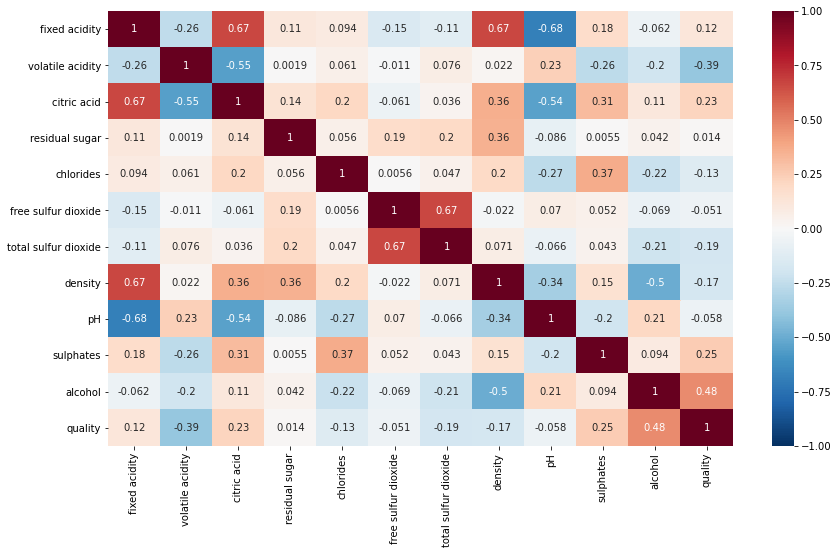

In [14]:
correlation = df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

## Outcome of Correlation; 
#### Fixed acidity has 12 percent corr. with the target column which can be considered as a Weak bond. volatile acidity has 39 percent corr. with the target column which can be considered as a Strong bond. Citric acid has 22 percent corr. with the target column which can be considered as a Good bond. Residual sugar has 14 percent corr. with the target column which can be considered as a Good Bond. chlorides has 13 percent corr. with the target column which can be considered as a Good bond. free sulfur dioxide has 51 percent corr. with the target column which can be considered as a Strong bond. Total Sulfur dioxide has 19 percent corr. with the target column which can be considered as a Good bond. Density has 18 percent corr. with the target column which can be considered as a Good bond. PH has 58 percent corr. with the target column which can be considered as a Strong bond. Sulphates has 25 percent corr. with the target column which can be considered as a Good Bond. Alcohal has 48 percent corr. with the target column which can be considered as a Strong bond.  

In [15]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

#### Now we can clearly identify the correlation of independent variable with the target class. 




In [23]:
# we will remove the skewness using power_tranform function
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x_new=pd.DataFrame(df,columns=x.columns)

ValueError: could not convert string to float: 'bad'

In [19]:
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

## Checking outliers: 

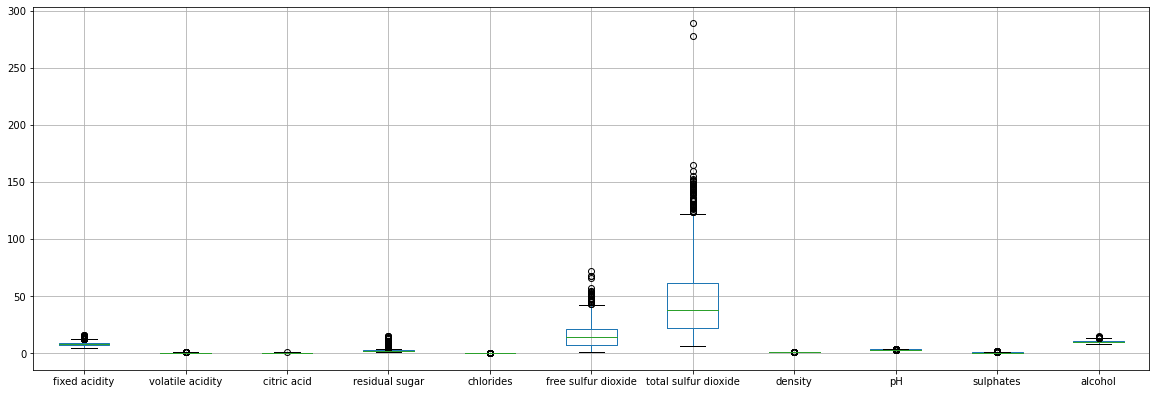

In [20]:
# plotting boxplot for all the columns
x.iloc[::].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

## ZScore:

#### will try to remove outliers using Zscore. 

In [21]:
from scipy.stats import zscore
import numpy as np 
z=np.abs(zscore(x))
z.shape

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
threshold=3
print(np.where(z>3))

In [ ]:
df_new=x[(z<3).all(axis=1)]
print(x.shape)
print(df_new.shape)

In [ ]:
## Percentage data loss: 
loss_percent=(1599-1539)/1599*100
print(loss_percent)

#### As the loss percentage is very less we can proceed 

# Finding Best Random_state:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


In [ ]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state =i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    print("Best accuracy is",maxAccu,"On Random_state",maxRS)

#### Best accuracy is 0.996875 on Random_state 22
##### we have found the best random_state value as 22. we will create our train-test-split using random_state.


## Creating Train-Test-split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20, random_state = 22)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print("Accuracy",accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print("Accuracy",accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = dt.predict(x_test)
print("Accuracy",accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

#### Random forest, Decision tree are producing Best accuracy. Now will check validation score as well for overfitting(if exists)

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print("Cross Validation score of LR model:", scr.mean())

In [ ]:
scr=cross_val_score(dt, x, y, cv=5)
print("Cross Validation score of DT model:", scr.mean())

In [ ]:
scr=cross_val_score(rf, x, y, cv=5)
print("Cross Validation score of rf model:", scr.mean())

#### Decision Tree Classifier is performing best among all so will continue with Decision tree Classifier. 
#### Also as mention in Dataset we have to move with Decision tree Classifier only and as we get the best fit is also DecisionTree classifier. 

## Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

## Creating parameter list to pass in GridsearchCV
parameters = {'max_features':['auto', 'sqrt', 'log2'], "max_depth":[4,5,6,7,8], "criterion":['gini', 'entropy']}


In [ ]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train) # Fitting the data in model
GCV.best_params_  # Printing the best parameter found by GridSearchCV

In [ ]:
GCV_pred=GCV.best_estimator_.predict(x_test) # Prediciting with the best parameters
accuracy_score(y_test,GCV_pred) # Checking final accuracy

#### Accuracy of my model after Hyper parameter tuning is 0.946875. 

## ROC AUC Plot

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

## Saving the model in Pickle format

In [ ]:
import joblib
joblib.dump(GCV.best_estimator_,"Redwine.pkl)

## Conclusion